### Discover users who are accessing our curriculum pages way beyond the end of their codeup time. What would the dataframe look like?

### Use time series method for detecting anomalies, like exponential moving average with %b.

### Bonus: Can you label students who are viewing both the web dev and data science curriculum? Can you label students by the program they are in? Can you label users by student vs. staff? What are Zach, Maggie, David, and Ryan's ids?

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("anonymized-curriculum-access.txt", sep=" ", header=None)

In [6]:
len(df)

399195

In [7]:
df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


- Concatenate date and time which were separated upon retrieving the data, and rename column as `timestamp`
- Change data type of `timestamp` and set as a datetime index
- Drop original `0` and `1` columns

In [9]:
df["timestamp"] = df[0] + " " + df[1]

In [10]:
# My attempt to Regex
# access = access[0].str.extract(r'(?P<timestamp>^[0-9]{4}\-[0-9]{2}\-[0-9]{2}\s[0-9]{2}\:[0-9]{2}\:[0-9]{2})\s(?P<url>.+)\s(?P<id1>[0-9]+)\s(?P<id2>[0-9]+)\s(?P<ip>[0-9]+\.[0-9]{3}\.[0-9]{2}\.[0-9]{2})', expand=True)

In [11]:
df.timestamp = pd.to_datetime(df.timestamp, infer_datetime_format=True)
df = df.drop(columns=[0,1])

Rename columns

In [12]:
df[["url","id_ind","id_group","ip"]] = df[[2,3,4,5]]
df.drop(columns=df[[2,3,4,5]],inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399195 entries, 0 to 399194
Data columns (total 5 columns):
timestamp    399195 non-null datetime64[ns]
url          399195 non-null object
id_ind       399195 non-null int64
id_group     372441 non-null float64
ip           399195 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 15.2+ MB


Change data type of `id_group` to category

In [14]:
df.id_group = df.id_group.fillna(0)
df.id_group = df.id_group.astype("int")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399195 entries, 0 to 399194
Data columns (total 5 columns):
timestamp    399195 non-null datetime64[ns]
url          399195 non-null object
id_ind       399195 non-null int64
id_group     399195 non-null int64
ip           399195 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 15.2+ MB


In [16]:
df = df.set_index("timestamp")

## Explore

In [17]:
daily = df.copy()
daily = daily.resample("D").count()

Text(0.5, 1.0, 'How often does the Curriculum being accessed?')

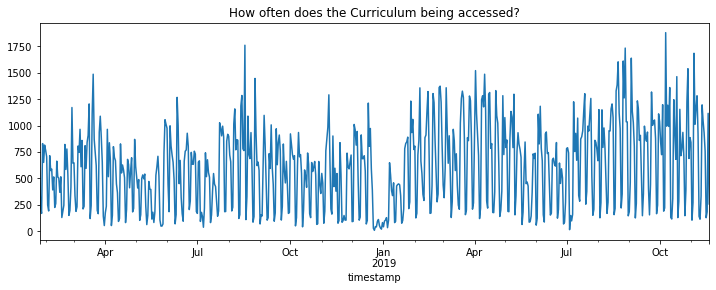

In [18]:
daily.url.plot(figsize=(12,4))
plt.title("How often does the Curriculum being accessed?")

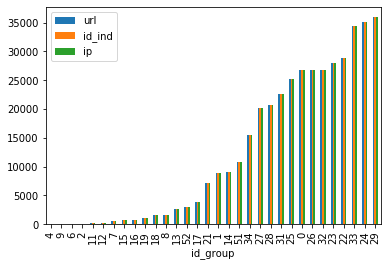

In [45]:
df.groupby("id_group").agg("count").sort_values(by="url",ascending=True).plot.bar()

In [56]:
df.head()

,url,id_ind,id_group,ip
timestamp,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61


In [66]:
df[df.url == "Clustering_KMeans_1"]

,url,id_ind,id_group,ip
timestamp,,,,
2019-03-28 14:26:31,Clustering_KMeans_1,368,0,97.105.19.58
2019-03-28 14:32:22,Clustering_KMeans_1,372,0,97.105.19.58
2019-03-29 07:56:15,Clustering_KMeans_1,1,28,97.105.19.58
2019-03-29 13:27:45,Clustering_KMeans_1,397,28,108.84.76.42
2019-03-29 13:30:18,Clustering_KMeans_1,397,28,108.84.76.42


In [64]:
df[df.id_group==28]

,url,id_ind,id_group,ip
timestamp,,,,
2018-12-06 14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28,97.105.19.58
2018-12-06 14:25:40,javascript-i,314,28,97.105.19.58
2018-12-06 14:25:41,javascript-i/coffee-project,314,28,97.105.19.58
2018-12-06 15:31:29,spring,40,28,170.248.173.247
2018-12-06 15:31:33,spring/fundamentals/security,40,28,170.248.173.247
2018-12-06 15:33:32,appendix/further-reading/spring/authorization,40,28,170.248.173.247
2018-12-06 15:34:29,spring/fundamentals/security/authentication,40,28,170.248.173.247
2018-12-06 15:38:58,appendix/further-reading/spring/authorization,40,28,170.248.173.247
2018-12-06 15:39:55,appendix/further-reading/spring/security-use-c...,40,28,170.248.173.247


28 is Ada

In [69]:
df[df.id_group == 34]

,url,id_ind,id_group,ip
timestamp,,,,
2019-08-20 09:39:58,/,466,34,97.105.19.58
2019-08-20 09:39:59,/,467,34,97.105.19.58
2019-08-20 09:39:59,/,468,34,97.105.19.58
2019-08-20 09:40:02,/,469,34,97.105.19.58
2019-08-20 09:40:08,/,470,34,97.105.19.58
2019-08-20 09:40:15,/,471,34,97.105.19.58
2019-08-20 09:40:15,/,472,34,97.105.19.58
2019-08-20 09:40:17,/,473,34,97.105.19.58
2019-08-20 09:40:18,/,474,34,97.105.19.58


34 is Bayes

In [55]:
list(df.url.unique())

['/',
 'java-ii',
 'java-ii/object-oriented-programming',
 'slides/object_oriented_programming',
 'javascript-i/conditionals',
 'javascript-i/loops',
 'javascript-i/functions',
 'mkdocs/search_index.json',
 'javascript-i/introduction/working-with-data-types-operators-and-variables',
 'javascript-i',
 'javascript-i/introduction/variables',
 'javascript-i/introduction/operators',
 'git/merge-conflict-demo',
 'git/working-in-teams',
 'javascript-i/introduction/primitive-types',
 'javascript-i/javascript-with-html',
 'spring',
 'appendix',
 'spring/extra-features/file-upload',
 'appendix/capstone-workbook',
 'javascript-i/objects/math',
 'index.html',
 'java-i',
 'appendix/further-reading/javascript/hoisting.html',
 'html-css/introduction',
 'javascript-i/bom-and-dom',
 'javascript-i/bom-and-dom/bom',
 'examples/javascript/defuse-the-bom.html',
 'javascript-i/introduction',
 'javascript-i/bom-and-dom/dom',
 'examples/javascript/dom-query-js.html',
 'spring/fundamentals/security/authenticat

In [36]:
df.id_group[df.url == "/"].unique()

array([ 8, 22,  1, 21, 18, 19,  0, 13, 14, 15,  7,  4, 12, 16, 17, 23,  2,
        9, 11, 24, 25, 26,  6, 27, 28, 29, 31, 32, 33, 34, 51, 52])

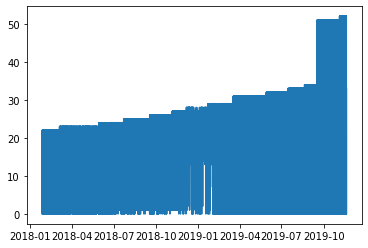

In [118]:
# objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
# y_pos = np.arange(len(objects))
# performance = [10,8,6,4,2,1]

# plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
# plt.title('Programming language usage')

(array([ 1.,  3.,  3.,  4., 16., 28., 50., 76., 72., 98., 62., 46., 38.,
        28., 28., 34., 18.,  9., 20.,  8., 11.,  3.,  4.,  1.,  2.]),
 array([ 9.74652778, 11.10845045, 12.47037312, 13.8322958 , 15.19421847,
        16.55614114, 17.91806381, 19.27998649, 20.64190916, 22.00383183,
        23.3657545 , 24.72767718, 26.08959985, 27.45152252, 28.8134452 ,
        30.17536787, 31.53729054, 32.89921321, 34.26113589, 35.62305856,
        36.98498123, 38.3469039 , 39.70882658, 41.07074925, 42.43267192,
        43.79459459]),
 <a list of 25 Patch objects>)

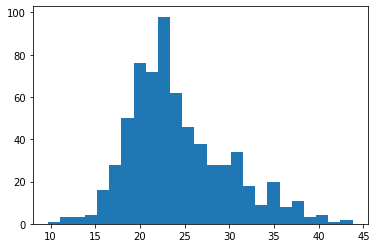

In [74]:
plt.hist(x=daily.id_group, bins=25)

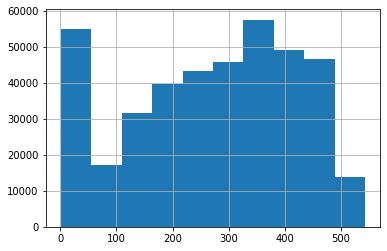

In [17]:
access.id_ind.hist()